The take home exam consisted of importing some datasets on containers in Amsterdam through API, then cleaning the dataset and, finally, performing some visualizations. 

First, I run the necessary libraries to retreive the API data and consequently  wrangle, analyse and save the data.

In [1]:
import requests
import json
from pprint import pprint
from pandas import json_normalize
import regex
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Second, I retrieve the data from the three APIs. I start by doing so for the first API. I then do the same process for the second and the third API

In [2]:
r = requests.get("https://api.data.amsterdam.nl/afval/v1/containers/")

data = r.json()
print(data.keys())
pprint(data)

dict_keys(['_links', 'count', 'results'])
{'_links': {'next': {'href': 'https://api.data.amsterdam.nl/afval/v1/containers/?page=2'},
            'previous': {'href': None},
            'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/containers/'}},
 'count': 23138,
 'results': [{'_display': 'Container object (2830)',
              '_links': {'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/containers/2830/'}},
              'active': 0,
              'address': 'Jan Evertsenstraat 717, Amsterdam',
              'container_type': {'id': 27,
                                 'name': 'Nieuw-West (SV)  Rest 5m3 TR Opl '
                                         'inst',
                                 'volume': 5.0,
                                 'weight': 700},
              'id': 2830,
              'id_number': 'REF31242',
              'operational_date': '2008-08-02T00:00:00Z',
              'owner': {'id': 184, 'name': 'Amsterdam Dump Locatie'},
              'placin

In [3]:
r = requests.get("https://api.data.amsterdam.nl/afval/v1/wells/")
data1 = r.json()
print(data1.keys())
pprint(data1)

dict_keys(['_links', 'count', 'results'])
{'_links': {'next': {'href': 'https://api.data.amsterdam.nl/afval/v1/wells/?page=2'},
            'previous': {'href': None},
            'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/wells/'}},
 'count': 22294,
 'results': [{'_display': 'Well object (2829)',
              '_links': {'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/wells/2829/'}},
              'address': {'district': 'F86 - Overtoomse Veld',
                          'neighbourhood': '86a - Overtoomse Veld Noord',
                          'summary': 'Jan Evertsenstraat 717, Amsterdam'},
              'buurt_code': 'F86a',
              'containers': {'count': 2,
                             'href': 'https://api.data.amsterdam.nl/afval/v1/containers/?well=2829'},
              'created_at': '2010-09-22T11:55:35Z',
              'geometrie': {'coordinates': [4.8357449, 52.3698168],
                            'type': 'Point'},
              'id': 2829,
      

In [4]:
r = requests.get("https://api.data.amsterdam.nl/afval/v1/sites/")
data2 = r.json()
print(data2.keys())
pprint(data2)

dict_keys(['_links', 'count', 'results'])
{'_links': {'next': {'href': 'https://api.data.amsterdam.nl/afval/v1/sites/?page=2'},
            'previous': {'href': None},
            'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/sites/'}},
 'count': 4214,
 'results': [{'_display': '112973-485077-F84b-Schotse Hooglanden 60',
              '_links': {'self': {'href': 'https://api.data.amsterdam.nl/afval/v1/sites/112973-485077-F84b/'}},
              'centroid': {'coordinates': [4.770360950305084,
                                           52.35199187960165],
                           'type': 'Point'},
              'fracties': {'containers': {'Rest': 2},
                           'volumes_m3': {'Rest': 8.0}},
              'huisnummer': 60,
              'id': '112973-485077-F84b',
              'short_id': 594260,
              'stadsdeel': 'F',
              'straatnaam': 'Schotse Hooglanden',
              'wells': {'count': 2,
                        'href': 'https://api.da

Third, I flattening the data retrieved from the three APIs. This gives a better overview of the data and helps understanding what the data is about. I am using 'results' as a key as it seems to be the one that gives the most important info on the API website. I start by flattening the data the first API and then I do the same with the second and third API.

In [5]:
d = json_normalize(data["results"])
d.head()

,_display,id,id_number,active,waste_type,waste_name,warranty_date,operational_date,placing_date,well,address,_links.self.href,owner.id,owner.name,container_type.id,container_type.name,container_type.volume,container_type.weight
0,Container object (2830),2830,REF31242,0,1,Rest,2005-12-31T00:00:00Z,2008-08-02T00:00:00Z,2008-08-02T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/2...,"Jan Evertsenstraat 717, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,184,Amsterdam Dump Locatie,27,Nieuw-West (SV) Rest 5m3 TR Opl inst,5.0,700
1,Container object (2860),2860,REF60815,0,1,Rest,2008-12-30T00:00:00Z,None,None,https://api.data.amsterdam.nl/afval/v1/wells/2...,"Burgemeester Eliasstraat 43-2, 1063EW, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,184,Amsterdam Dump Locatie,27,Nieuw-West (SV) Rest 5m3 TR Opl inst,5.0,700
2,Container object (3494),3494,REF31790,0,1,Rest,2011-06-29T00:00:00Z,2010-06-29T00:00:00Z,2010-06-29T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Uffizilaan 11, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,184,Amsterdam Dump Locatie,27,Nieuw-West (SV) Rest 5m3 TR Opl inst,5.0,700
3,Container object (3560),3560,REF60451,0,1,Rest,2011-11-29T00:00:00Z,2010-11-29T00:00:00Z,2010-11-29T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Guggenheimlaan 59, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,184,Amsterdam Dump Locatie,138,Nieuw-West papier 5m3,5.0,650
4,Container object (3566),3566,PAF60060,0,6,Papier,2011-11-30T00:00:00Z,2010-02-09T00:00:00Z,2010-02-09T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Mezquitalaan 43, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,184,Amsterdam Dump Locatie,138,Nieuw-West papier 5m3,5.0,650


In [6]:
d1 = json_normalize(data1["results"])
d1.head()

,_display,id,id_number,serial_number,buurt_code,stadsdeel,created_at,warranty_date,operational_date,site,_links.self.href,geometrie.type,geometrie.coordinates,containers.count,containers.href,address.summary,address.district,address.neighbourhood
0,Well object (2829),2829,WLREF31651,WL118921,F86a,F,2010-09-22T11:55:35Z,2028-12-31T00:00:00Z,None,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/2...,Point,"[4.8357449, 52.3698168]",2,https://api.data.amsterdam.nl/afval/v1/contain...,"Jan Evertsenstraat 717, Amsterdam",F86 - Overtoomse Veld,86a - Overtoomse Veld Noord
1,Well object (2859),2859,REF60815,118855,F76a,F,2010-09-29T14:06:38Z,2008-12-31T00:00:00Z,None,None,https://api.data.amsterdam.nl/afval/v1/wells/2...,Point,"[4.826871156692505, 52.38157216012434]",1,https://api.data.amsterdam.nl/afval/v1/contain...,"Burgemeester Eliasstraat 43-2, 1063EW, Amsterdam",Nieuw-West,F76 - Slotermeer-Noordoost
2,Well object (3235),3235,WLREF31057,WLREF31057,F86b,F,2010-10-18T14:41:11Z,2028-12-31T00:00:00Z,None,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/3...,Point,"[4.8403859, 52.3606233]",1,https://api.data.amsterdam.nl/afval/v1/contain...,"Derkinderenstraat 11, Amsterdam",F86 - Overtoomse Veld,86b - Overtoomse Veld Zuid
3,Well object (3493),3493,WLREF35075,WL60093,F85a,F,2010-11-30T15:44:57Z,2030-08-30T00:00:00Z,None,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/3...,Point,"[4.8314285, 52.3667671]",2,https://api.data.amsterdam.nl/afval/v1/contain...,"Uffizilaan 11, Amsterdam",F85 - Slotervaart Noord,85a - Oostoever Sloterplas
4,Well object (3559),3559,WLREF35060,WL60451,F85a,F,2010-12-03T15:44:23Z,2030-11-28T00:00:00Z,None,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/3...,Point,"[4.8294377, 52.3678161]",2,https://api.data.amsterdam.nl/afval/v1/contain...,"Guggenheimlaan 59, Amsterdam",F85 - Slotervaart Noord,85a - Oostoever Sloterplas


In [7]:
d2 = json_normalize(data2["results"])
d2.head()

,_display,id,short_id,stadsdeel,straatnaam,huisnummer,_links.self.href,wells.count,wells.href,fracties.containers.Rest,fracties.volumes_m3.Rest,centroid.type,centroid.coordinates,fracties.containers.Papier,fracties.volumes_m3.Papier,fracties.containers.Glas,fracties.volumes_m3.Glas
0,112973-485077-F84b-Schotse Hooglanden 60,112973-485077-F84b,594260,F,Schotse Hooglanden,60,https://api.data.amsterdam.nl/afval/v1/sites/1...,2,https://api.data.amsterdam.nl/afval/v1/wells/?...,2.0,8.0,Point,"[4.770360950305084, 52.35199187960165]",NaN,NaN,NaN,NaN
1,113044-485173-F84b-Schotse Hooglanden 24,113044-485173-F84b,594224,F,Schotse Hooglanden,24,https://api.data.amsterdam.nl/afval/v1/sites/1...,2,https://api.data.amsterdam.nl/afval/v1/wells/?...,2.0,6.0,Point,"[4.771383478042294, 52.35285580231497]",NaN,NaN,NaN,NaN
2,113095-485088-F84b-La Meye 32,113095-485088-F84b,592132,F,La Meye,32,https://api.data.amsterdam.nl/afval/v1/sites/1...,2,https://api.data.amsterdam.nl/afval/v1/wells/?...,2.0,8.0,Point,"[4.772143476437362, 52.35209430145116]",NaN,NaN,NaN,NaN
3,113104-485015-F84b-Le Tourmalet 54,113104-485015-F84b,592054,F,Le Tourmalet,54,https://api.data.amsterdam.nl/afval/v1/sites/1...,2,https://api.data.amsterdam.nl/afval/v1/wells/?...,2.0,8.0,Point,"[4.772281174339349, 52.35143709902364]",NaN,NaN,NaN,NaN
4,113105-484894-F84b-Pyreneeën 23,113105-484894-F84b,219823,F,Pyreneeën,23,https://api.data.amsterdam.nl/afval/v1/sites/1...,2,https://api.data.amsterdam.nl/afval/v1/wells/?...,2.0,8.0,Point,"[4.77231474867903, 52.35035497265083]",NaN,NaN,NaN,NaN


In [8]:
#Fourth, I retrieve multiple pages for the three APIs in order to have a more representative sample of the data. I retrieve 200 pages per API as it seems to be a sample big enough. I start by doing so for the first API and I then flattening the data in order to visualise into a table. i repeat the same process for the second and the third API.

In [9]:
url_containers = "https://api.data.amsterdam.nl/afval/v1/containers/?page="

multiple_containers = []
for i in range(1,200):
    r = requests.get(url_containers+f"{i}")
    data = r.json()
    if not "results" in data:
        print(f"Retrieved{len(allitems)}," "got all results")
        break
    multiple_containers.extend(data["results"])
    i += 1

data_containers = json_normalize(multiple_containers)
data_containers.head()

,_display,id,id_number,active,waste_type,waste_name,warranty_date,operational_date,placing_date,well,address,_links.self.href,owner.id,owner.name,container_type.id,container_type.name,container_type.volume,container_type.weight
0,Container object (2830),2830,REF31242,0,1,Rest,2005-12-31T00:00:00Z,2008-08-02T00:00:00Z,2008-08-02T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/2...,"Jan Evertsenstraat 717, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,184,Amsterdam Dump Locatie,27,Nieuw-West (SV) Rest 5m3 TR Opl inst,5.0,700.0
1,Container object (2860),2860,REF60815,0,1,Rest,2008-12-30T00:00:00Z,None,None,https://api.data.amsterdam.nl/afval/v1/wells/2...,"Burgemeester Eliasstraat 43-2, 1063EW, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,184,Amsterdam Dump Locatie,27,Nieuw-West (SV) Rest 5m3 TR Opl inst,5.0,700.0
2,Container object (3494),3494,REF31790,0,1,Rest,2011-06-29T00:00:00Z,2010-06-29T00:00:00Z,2010-06-29T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Uffizilaan 11, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,184,Amsterdam Dump Locatie,27,Nieuw-West (SV) Rest 5m3 TR Opl inst,5.0,700.0
3,Container object (3560),3560,REF60451,0,1,Rest,2011-11-29T00:00:00Z,2010-11-29T00:00:00Z,2010-11-29T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Guggenheimlaan 59, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,184,Amsterdam Dump Locatie,138,Nieuw-West papier 5m3,5.0,650.0
4,Container object (3566),3566,PAF60060,0,6,Papier,2011-11-30T00:00:00Z,2010-02-09T00:00:00Z,2010-02-09T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Mezquitalaan 43, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,184,Amsterdam Dump Locatie,138,Nieuw-West papier 5m3,5.0,650.0


In [10]:
url_wells = "https://api.data.amsterdam.nl/afval/v1/wells/?page="

multiple_wells = []
for i in range(1,200):
    r = requests.get(url_wells+f"{i}")
    data1 = r.json()
    if not "results" in data1:
        print(f"Retrieved{len(allitems)}," "got all results")
        break
    multiple_wells.extend(data1["results"])
    i += 1

data_containers1 = json_normalize(multiple_wells)
data_containers1.head()

,_display,id,id_number,serial_number,buurt_code,stadsdeel,created_at,warranty_date,operational_date,site,_links.self.href,geometrie.type,geometrie.coordinates,containers.count,containers.href,address.summary,address.district,address.neighbourhood
0,Well object (2829),2829,WLREF31651,WL118921,F86a,F,2010-09-22T11:55:35Z,2028-12-31T00:00:00Z,None,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/2...,Point,"[4.8357449, 52.3698168]",2,https://api.data.amsterdam.nl/afval/v1/contain...,"Jan Evertsenstraat 717, Amsterdam",F86 - Overtoomse Veld,86a - Overtoomse Veld Noord
1,Well object (2859),2859,REF60815,118855,F76a,F,2010-09-29T14:06:38Z,2008-12-31T00:00:00Z,None,None,https://api.data.amsterdam.nl/afval/v1/wells/2...,Point,"[4.826871156692505, 52.38157216012434]",1,https://api.data.amsterdam.nl/afval/v1/contain...,"Burgemeester Eliasstraat 43-2, 1063EW, Amsterdam",Nieuw-West,F76 - Slotermeer-Noordoost
2,Well object (3235),3235,WLREF31057,WLREF31057,F86b,F,2010-10-18T14:41:11Z,2028-12-31T00:00:00Z,None,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/3...,Point,"[4.8403859, 52.3606233]",1,https://api.data.amsterdam.nl/afval/v1/contain...,"Derkinderenstraat 11, Amsterdam",F86 - Overtoomse Veld,86b - Overtoomse Veld Zuid
3,Well object (3493),3493,WLREF35075,WL60093,F85a,F,2010-11-30T15:44:57Z,2030-08-30T00:00:00Z,None,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/3...,Point,"[4.8314285, 52.3667671]",2,https://api.data.amsterdam.nl/afval/v1/contain...,"Uffizilaan 11, Amsterdam",F85 - Slotervaart Noord,85a - Oostoever Sloterplas
4,Well object (3559),3559,WLREF35060,WL60451,F85a,F,2010-12-03T15:44:23Z,2030-11-28T00:00:00Z,None,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/3...,Point,"[4.8294377, 52.3678161]",2,https://api.data.amsterdam.nl/afval/v1/contain...,"Guggenheimlaan 59, Amsterdam",F85 - Slotervaart Noord,85a - Oostoever Sloterplas


In [11]:
url_site = "https://api.data.amsterdam.nl/afval/v1/sites/?page="

multiple_site = []
for i in range(1,200):
    r = requests.get(url_site+f"{i}")
    data2 = r.json()
    if not "results" in data2:
        print(f"Retrieved{len(allitems)}," "got all results")
        break
    multiple_site.extend(data2["results"])
    i += 1

data_containers2 = json_normalize(multiple_site)
data_containers2.head()

,_display,id,short_id,stadsdeel,straatnaam,huisnummer,_links.self.href,wells.count,wells.href,fracties.containers.Rest,...,fracties.containers.Textiel,fracties.volumes_m3.Textiel,fracties.containers.GFT,fracties.volumes_m3.GFT,fracties.containers.Plastic,fracties.volumes_m3.Plastic,fracties.containers.Unkown,fracties.volumes_m3.Unkown,fracties.containers.KCA,fracties.volumes_m3.KCA
0,112973-485077-F84b-Schotse Hooglanden 60,112973-485077-F84b,594260,F,Schotse Hooglanden,60,https://api.data.amsterdam.nl/afval/v1/sites/1...,2,https://api.data.amsterdam.nl/afval/v1/wells/?...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,113044-485173-F84b-Schotse Hooglanden 24,113044-485173-F84b,594224,F,Schotse Hooglanden,24,https://api.data.amsterdam.nl/afval/v1/sites/1...,2,https://api.data.amsterdam.nl/afval/v1/wells/?...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,113095-485088-F84b-La Meye 32,113095-485088-F84b,592132,F,La Meye,32,https://api.data.amsterdam.nl/afval/v1/sites/1...,2,https://api.data.amsterdam.nl/afval/v1/wells/?...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,113104-485015-F84b-Le Tourmalet 54,113104-485015-F84b,592054,F,Le Tourmalet,54,https://api.data.amsterdam.nl/afval/v1/sites/1...,2,https://api.data.amsterdam.nl/afval/v1/wells/?...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,113105-484894-F84b-Pyreneeën 23,113105-484894-F84b,219823,F,Pyreneeën,23,https://api.data.amsterdam.nl/afval/v1/sites/1...,2,https://api.data.amsterdam.nl/afval/v1/wells/?...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fifth, I clean up the data table by table. I start with the first data table. First, I rename some variables so that it is easier to join the table later with the other tables. Then, I now drop the columns that are surperlous or too nested to be used for the analysis. For example, as the id variable has been renamed as id_container, the _display variable is now redundant.I also extract the year only from the operational date variable as the month and day are not useful for the analysis that I will perform later. Finally, I check the result of the data cleaning. The table now gives a good overview of the relevant data about containers in Amsterdam.

In [12]:
data_containers_rename = data_containers.rename(columns={"id": "id_container",
                                                          "well": "well_href",
                                                          "_links.self.href": "container.href",
                                                          "operational_date": "operational_date_container",
                                                          "warranty_date": "warranty_date_container",
                                                        "active": "operational status"})

data_containers_drop = data_containers_rename.drop(columns=["waste_type", "owner.id", "placing_date", "container_type.name", "_display", "id_number"])

data_containers_drop["operational_date_container"] = data_containers_drop["operational_date_container"].str.extract(r'(\d{4})')

data_containers_drop.head()

,id_container,operational status,waste_name,warranty_date_container,operational_date_container,well_href,address,container.href,owner.name,container_type.id,container_type.volume,container_type.weight
0,2830,0,Rest,2005-12-31T00:00:00Z,2008,https://api.data.amsterdam.nl/afval/v1/wells/2...,"Jan Evertsenstraat 717, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,Amsterdam Dump Locatie,27,5.0,700.0
1,2860,0,Rest,2008-12-30T00:00:00Z,NaN,https://api.data.amsterdam.nl/afval/v1/wells/2...,"Burgemeester Eliasstraat 43-2, 1063EW, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,Amsterdam Dump Locatie,27,5.0,700.0
2,3494,0,Rest,2011-06-29T00:00:00Z,2010,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Uffizilaan 11, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,Amsterdam Dump Locatie,27,5.0,700.0
3,3560,0,Rest,2011-11-29T00:00:00Z,2010,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Guggenheimlaan 59, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,Amsterdam Dump Locatie,138,5.0,650.0
4,3566,0,Papier,2011-11-30T00:00:00Z,2010,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Mezquitalaan 43, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,Amsterdam Dump Locatie,138,5.0,650.0


I now clean the data of the second table. Again, I start by renaming some of the variables. I then now drop the columns that contain surperflous, unclear or too nested data. I also clean the district variable so that it only contains the district name and not also the zipcode. In this wasy the variable is more clear. I also change the value names of the variable stadsdeel so that it is more understandable and also because it will be useful for my analysis later. Finally, I check the results of the data cleaning. The table now contains all of the relevant info regarding the wells. 

In [13]:
data_containers1_rename = data_containers1.rename(columns={"id": "id_well",
                                                        "created_at": "operational_date_well",
                                                        "warranty_date": "warranty_date_well",
                                                        "address.summary": "address",
                                                          "_links.self.href": "well_href",
                                                           "site": "site.href",
                                                          "address.district": "district"})

data_containers1_drop = data_containers1_rename.drop(columns=["_display", "id_number", "serial_number", "buurt_code", "containers.count", "operational_date", "address.neighbourhood"])
data_containers1_drop.head()

data_containers1_drop["district"] = data_containers1_drop["district"].str.replace("[A-Za-z]+\d+ -", "", regex = True)

data_containers1_drop.head()

,id_well,stadsdeel,operational_date_well,warranty_date_well,site.href,well_href,geometrie.type,geometrie.coordinates,containers.href,address,district
0,2829,F,2010-09-22T11:55:35Z,2028-12-31T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/2...,Point,"[4.8357449, 52.3698168]",https://api.data.amsterdam.nl/afval/v1/contain...,"Jan Evertsenstraat 717, Amsterdam",Overtoomse Veld
1,2859,F,2010-09-29T14:06:38Z,2008-12-31T00:00:00Z,None,https://api.data.amsterdam.nl/afval/v1/wells/2...,Point,"[4.826871156692505, 52.38157216012434]",https://api.data.amsterdam.nl/afval/v1/contain...,"Burgemeester Eliasstraat 43-2, 1063EW, Amsterdam",Nieuw-West
2,3235,F,2010-10-18T14:41:11Z,2028-12-31T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/3...,Point,"[4.8403859, 52.3606233]",https://api.data.amsterdam.nl/afval/v1/contain...,"Derkinderenstraat 11, Amsterdam",Overtoomse Veld
3,3493,F,2010-11-30T15:44:57Z,2030-08-30T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/3...,Point,"[4.8314285, 52.3667671]",https://api.data.amsterdam.nl/afval/v1/contain...,"Uffizilaan 11, Amsterdam",Slotervaart Noord
4,3559,F,2010-12-03T15:44:23Z,2030-11-28T00:00:00Z,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/3...,Point,"[4.8294377, 52.3678161]",https://api.data.amsterdam.nl/afval/v1/contain...,"Guggenheimlaan 59, Amsterdam",Slotervaart Noord


Finally, I do the same for the third table. I first rename some variables, then I drop sopme of the coluns which are not relevant or too nested. Then, I merge the columns straatnaam and huisnummer as they refer to the same information and there is no need to have them in two different columns. Especially, having the house number in one column does not give any useful information. Then, I check the result of the cleaning of the third table. Now the table contains all of the relevant information

In [14]:
data_containers2_rename = data_containers2.rename(columns={"short_id": "id_site",
                                                        "_links.self.href": "site.href",
                                                        "wells.href": "well_href",
                                                        "stadsdeel": "stadsdeel_site",
                                                          "_links.self.href": "site_href"})

data_containers2_drop = data_containers2_rename.drop(columns=["_display", "id", "straatnaam", "huisnummer", "wells.count", "fracties.containers.Rest", "fracties.containers.Textiel", "fracties.volumes_m3.Textiel", "fracties.containers.GFT", "fracties.volumes_m3.GFT", "fracties.containers.Plastic", "fracties.volumes_m3.Plastic", "fracties.containers.Unkown", "fracties.volumes_m3.Unkown", "fracties.containers.KCA", "fracties.volumes_m3.KCA", "fracties.volumes_m3.Rest", "fracties.containers.Papier", "fracties.volumes_m3.Papier", "fracties.containers.Glas", "fracties.volumes_m3.Glas"])

data_containers2_drop['adreess_site'] = data_containers2['straatnaam'].astype(str).str.cat(data_containers2['huisnummer'].astype(str), sep=' ')

data_containers2_drop.head() 

,id_site,stadsdeel_site,site_href,well_href,centroid.type,centroid.coordinates,adreess_site
0,594260,F,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/?...,Point,"[4.770360950305084, 52.35199187960165]",Schotse Hooglanden 60
1,594224,F,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/?...,Point,"[4.771383478042294, 52.35285580231497]",Schotse Hooglanden 24
2,592132,F,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/?...,Point,"[4.772143476437362, 52.35209430145116]",La Meye 32
3,592054,F,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/?...,Point,"[4.772281174339349, 52.35143709902364]",Le Tourmalet 54
4,219823,F,https://api.data.amsterdam.nl/afval/v1/sites/1...,https://api.data.amsterdam.nl/afval/v1/wells/?...,Point,"[4.77231474867903, 52.35035497265083]",Pyreneeën 23


I now merge the threee table into one. I start by merging all of the columns into one. Then, I merge the third table to the new one that I have created. Finally, I transform the data into a dataframe and I check the result of the final merged table. 

In [15]:
firstwotables = data_containers_drop.merge(data_containers1_drop, how='outer')  
finaldata = firstwotables.merge(data_containers2_drop, how='outer')
df_finaldata = pd.DataFrame(finaldata)
df_finaldata.head()

,id_container,operational status,waste_name,warranty_date_container,operational_date_container,well_href,address,container.href,owner.name,container_type.id,...,geometrie.type,geometrie.coordinates,containers.href,district,id_site,stadsdeel_site,site_href,centroid.type,centroid.coordinates,adreess_site
0,2830.0,0.0,Rest,2005-12-31T00:00:00Z,2008,https://api.data.amsterdam.nl/afval/v1/wells/2...,"Jan Evertsenstraat 717, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,Amsterdam Dump Locatie,27.0,...,Point,"[4.8357449, 52.3698168]",https://api.data.amsterdam.nl/afval/v1/contain...,Overtoomse Veld,NaN,NaN,NaN,NaN,NaN,NaN
1,2860.0,0.0,Rest,2008-12-30T00:00:00Z,NaN,https://api.data.amsterdam.nl/afval/v1/wells/2...,"Burgemeester Eliasstraat 43-2, 1063EW, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,Amsterdam Dump Locatie,27.0,...,Point,"[4.826871156692505, 52.38157216012434]",https://api.data.amsterdam.nl/afval/v1/contain...,Nieuw-West,NaN,NaN,NaN,NaN,NaN,NaN
2,3494.0,0.0,Rest,2011-06-29T00:00:00Z,2010,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Uffizilaan 11, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,Amsterdam Dump Locatie,27.0,...,Point,"[4.8314285, 52.3667671]",https://api.data.amsterdam.nl/afval/v1/contain...,Slotervaart Noord,NaN,NaN,NaN,NaN,NaN,NaN
3,3560.0,0.0,Rest,2011-11-29T00:00:00Z,2010,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Guggenheimlaan 59, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,Amsterdam Dump Locatie,138.0,...,Point,"[4.8294377, 52.3678161]",https://api.data.amsterdam.nl/afval/v1/contain...,Slotervaart Noord,NaN,NaN,NaN,NaN,NaN,NaN
4,3566.0,0.0,Papier,2011-11-30T00:00:00Z,2010,https://api.data.amsterdam.nl/afval/v1/wells/3...,"Mezquitalaan 43, Amsterdam",https://api.data.amsterdam.nl/afval/v1/contain...,Amsterdam Dump Locatie,138.0,...,Point,"[4.8317051, 52.3692318]",https://api.data.amsterdam.nl/afval/v1/contain...,Slotervaart Noord,NaN,NaN,NaN,NaN,NaN,NaN


I now get an overall statistical overview of the data that it can be easily red and understood by someone who is not familiar with python. 

finaldata.describe()

I now make a dataframe containg solely the variables that I will use for the visualisations. In the end, I mainly use data from the container table (first API) because I am mainly interested in the different types of waste containers and whether they are active or not. However, I also include the district from the

In [16]:
subset1_finaldata = df_finaldata[["operational status", "waste_name", "stadsdeel", "operational_date_container"]]
subset1_finaldata = subset1_finaldata.dropna()

Then, make the visualisations. I first make a barchart showing the amount of containers according to waste type. 

[Text(0.5, 0, 'Type of waste'), Text(0, 0.5, 'Number of containers')]

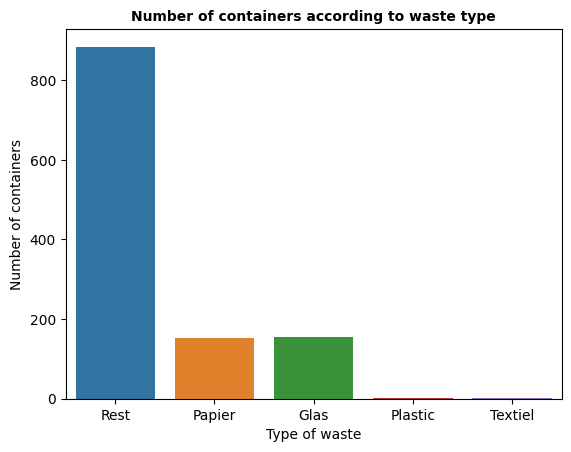

In [17]:
plot1 = sns.countplot(x = 'waste_name', data=subset1_finaldata)
plot1.set_title('Number of containers according to waste type', size=10, fontweight='bold', color='black')
plot1.set(xlabel='Type of waste',
       ylabel='Number of containers')
#plt.figure.savefig('Figure1.png'). I am not sure if this is an erro or not. The figure is saved in the home of my jupyter notebook, but not in the file from which I open the terminal. I out it as a comment just in case. 

Now, I make a bar chart showing the amount of containers according to waste type and operational status

C:\Users\franc\AppData\Local\Temp\ipykernel_19280\1167137574.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot2.figure.show()


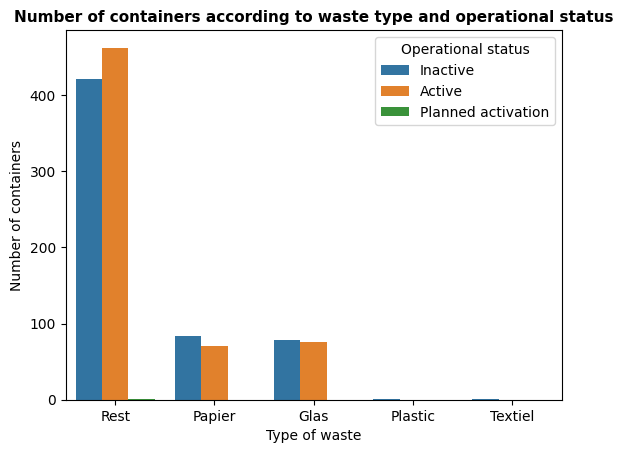

In [18]:
plot2 = sns.countplot(x="waste_name", hue="operational status", data=subset1_finaldata)    
plot2.legend(title='Operational status', labels = ['Inactive', 'Active', 'Planned activation'])  
plot2.set_title('Number of containers according to waste type and operational status', size=11, fontweight='bold', color='black')
plot2.set(xlabel='Type of waste',
       ylabel='Number of containers')
plot2.figure.savefig('Figure2.png') 
plot2.figure.show()

Then, I make a bar chart showing the amount of containers according to waste type and the district

C:\Users\franc\AppData\Local\Temp\ipykernel_19280\1533212890.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot3.figure.show()


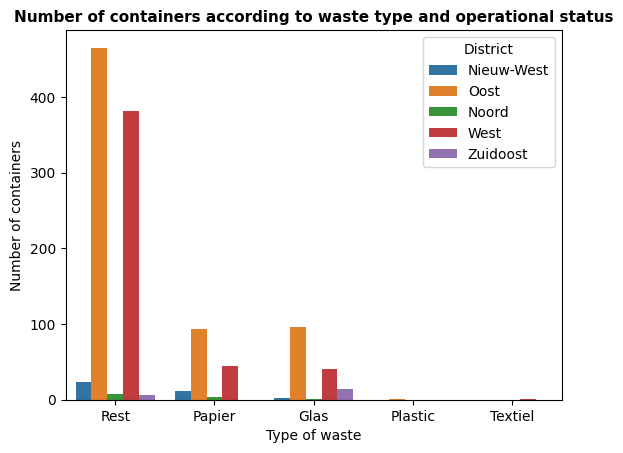

In [19]:
plot3 = sns.countplot(x="waste_name", hue="stadsdeel", data=subset1_finaldata)    
plot3.legend(title='District', labels=['Nieuw-West', 'Oost', 'Noord', 'West', 'Zuidoost'])  
plot3.set_title('Number of containers according to waste type and operational status', size=11, fontweight='bold', color='black')
plot3.set(xlabel='Type of waste',
       ylabel='Number of containers')
plot3.figure.savefig('Figure3.png')
plot3.figure.show()